In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_file_path = 'trade.csv'
trade = pd.read_csv(csv_file_path) 

In [5]:
# 결측치 처리
trade = trade.drop('기타사항', axis=1)

trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[191, '무역수지'] = (trade.loc[188, '무역수지'] + trade.loc[194, '무역수지'] )/2


In [6]:
# 중복 제거
trade.drop_duplicates(inplace=True)


In [7]:
print(trade.head(5))

          기간 국가명      수출건수        수출금액      수입건수       수입금액       무역수지
0  2015년 01월  중국  116932.0  12083947.0  334522.0  8143271.0  3940676.0
1  2015년 01월  미국   65888.0   5561545.0  509564.0  3625062.0  1936484.0
2  2015년 01월  일본   54017.0   2251307.0   82480.0  3827247.0 -1575940.0
3  2015년 02월  중국   86228.0   9927642.0  209100.0  6980874.0  2946768.0
4  2015년 02월  미국   60225.0   5021264.0  428678.0  2998216.0  2023048.0


Empty DataFrame
Columns: [기간, 국가명, 수출건수, 수출금액, 수입건수, 수입금액, 무역수지]
Index: []
0
16
198


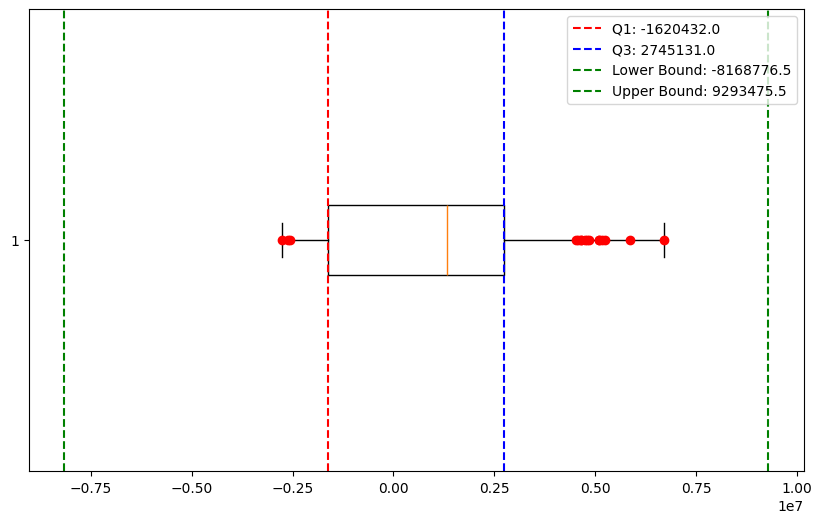

In [8]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
def outlier2(df, col, z):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - z * IQR
    upper_bound = Q3 + z * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# print(outlier2(trade, '무역수지', 1.5))
# print(len(outlier2(trade, '무역수지', 1.5)))

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(trade['무역수지'].dropna(), vert=False)

# IQR 범위 표시
Q1 = trade['무역수지'].quantile(0.25)
Q3 = trade['무역수지'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.axvline(Q1, color='r', linestyle='--', label=f'Q1: {Q1}')
plt.axvline(Q3, color='b', linestyle='--', label=f'Q3: {Q3}')
plt.axvline(lower_bound, color='g', linestyle='--', label=f'Lower Bound: {lower_bound}')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound: {upper_bound}')

# z-score로 찾은 이상치 점으로 표시
def outlier3(df, col, z):
    z_score = (df[col] - np.mean(df[col])) / np.std(df[col])
    return df[abs(z_score) > z].index

# print(len(outlier3(trade, '무역수지', 1.5)))
# print(len(trade))

# 이상치 검출
outlier_indices = outlier3(trade, '무역수지', 1.5)
outliers = trade.loc[outlier_indices, '무역수지']

# 이상치 점으로 표시
for outlier in outliers:
    plt.plot(outlier, 1, 'ro')  # 'ro'는 빨간색 점을 의미

plt.legend()
plt.show()